# Wstęp do Sztucznej Inteligencji - rok akademicki 2017/2018

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `{NrAlbumu}_{Nazwisko}_{Imie}_{PoprzedniaNazwa}`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia, w szczególności, że uzupełniłeś wszystkie pola `YOUR CODE HERE` oraz `YOUR ANSWER HERE`. Możesz również sprawdzić czy twoje rozwiązania przechodzą wstępną walidację (Validate). 

## Temat: Sztuczne Sieci Neuronowe - Lab 3
## Biblioteka Keras. Aspekty uczenia sieci neuronowych.
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.

### Sieci neuronowe w języku Python
Obecnie za sprawą rozwoju i popularności tzw. głębokich sieci neuronowych (Deep Neural Network) dostępnych jest bardzo dużo bibliotek/frameworków do budowy i uczenia sieci neuronowych (TensorFlow, Theano, Spark MLlib, MXNet, Microsoft Cognitive Toolkit, Caffe itp.). Z wielu z nich można korzystać w prosty sposób przy wykorzystaniu języka  Python.  

### Biblioteka Keras (na TensorFlow)
Biblioteka Keras jest wysokopoziomową nakładką na biblioteki takie jak TensorFlow, CNTK (Microsoft Cognitive Toolkit) lub Theano napisaną w języku Python. Domyślnie wykorzystywanym backendem jest TensorFlow i z takiego będziemy korzystać. Biblioteka ta pozwala na:
- Łatwe i szybkie prototypowanie modeli (pełna modularność).
- Wspiera zarówno "klasyczne" sieci neuronowe jak i konwolucyjne czy rekurencyjne. 
- Umożliwia uczenie przy wykorzystaniu CPU oraz GPU.

Keras: https://keras.io/

TensorFlow: https://www.tensorflow.org/



## Szybkie wprowadzenie na przykładzie sieci dla problemu XOR

### Dane:

In [15]:
import numpy as np
data_x = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])  # backpropagation nie lubi zer 
data_y = np.array([0,1,1,0])

### Przygotowanie architektury sieci

Stworzenie sieci MLP o dwóch neuronach ukrytych i jednym wyjściowym:

Tworzenie modelu odbywa się na zasadzie budowania z klocków. Najpier tworzymy model jako obieky klasy `Sequential` a następnie dodajemy do niego kojejne warstwy np. `Dense` (warstwa neuronów typu każdy z każdym). 

In [16]:
# komunikatem o niezgodności wersji nie należy się przejmować
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(2, input_dim=2, use_bias=True, activation='tanh', kernel_initializer='random_uniform', bias_initializer='random_uniform'))  #parametry patrz dokumentacja
model.add(Dense(1, use_bias=True, activation='sigmoid', kernel_initializer='random_uniform', bias_initializer='random_uniform'))  # parametry patrz dokumentacja
# alternatywnie activation można ustawić na None i dodać funkcje aktywacj jako osobną warstwę

### Kompilacja modelu

Po stworzeniu modelu należy go skompilować, podczas kompilacji podajemy m.in. rodzaj funkcji używanej do liczenia błędu (`loss`) oraz algorytm wykorzystywany do uczenia (`optimizer`). 

In [3]:
from keras import optimizers

rms = optimizers.RMSprop(lr=0.01)  # lr = learning rate; parametry patrz dokumentacja
model.compile(loss='mse', optimizer=rms) # mse = mean squared error

### Uczenie

Po kompilacji możemy przystąpić do uczenia za pomocą metody `fit`.

In [4]:
print('rozpoczecie uczenia')
#ustaw verbose=0 aby wylaczyc szczegoly 
hist = model.fit(data_x, data_y, epochs=300, verbose=1, batch_size=4)  # parametry patrz dokumentacja
print('koniec uczenia')
# ponowne wykonanie powoduje douczanie a nie uczenie od nowa

rozpoczecie uczenia
Epoch 1/300
4/4 [==============================] - 1s 140ms/step - loss: 0.2501
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2500
Epoch 3/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2500
Epoch 4/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2499
Epoch 5/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2498
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2497
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2494
Epoch 8/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2491
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2486
Epoch 10/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2481
Epoch 11/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2475
Epoch 12/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2468
Epoch 13/300
4/4 [=====================

Epoch 105/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1855
Epoch 106/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1852
Epoch 107/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1849
Epoch 108/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1846
Epoch 109/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1843
Epoch 110/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1840
Epoch 111/300
4/4 [==============================] - 0s 871us/step - loss: 0.1838
Epoch 112/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1835
Epoch 113/300
4/4 [==============================] - 0s 867us/step - loss: 0.1832
Epoch 114/300
4/4 [==============================] - 0s 5ms/step - loss: 0.1830
Epoch 115/300
4/4 [==============================] - 0s 816us/step - loss: 0.1827
Epoch 116/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1825
Epoch 117/300
4/4 [===============

Epoch 207/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1689
Epoch 208/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1685
Epoch 209/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1682
Epoch 210/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1677
Epoch 211/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1673
Epoch 212/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1668
Epoch 213/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1662
Epoch 214/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1656
Epoch 215/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1650
Epoch 216/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1642
Epoch 217/300
4/4 [==============================] - 0s 7ms/step - loss: 0.1635
Epoch 218/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1627
Epoch 219/300
4/4 [=====================

Sprawdzenie czego model się nauczył:

In [5]:
pred = model.predict(data_x)
print(pred)

[[ 0.04000511]
 [ 0.90694398]
 [ 0.51241422]
 [ 0.51034456]]


## Zagadnienie niedouczenia lub przeuczenia sieci

Przykładowy problem aproksymacji funkcji.

##### Zwróć uwagę
- W rzeczywistości dane często pochodzą z pomiarów, które obarczone są niepewnością. W poniższym przykładzie modelujemy to poprzez dodanie losowego błędu do wartości funkcji sinus. 

- Funkcja sinus pełni tu rolę rzeczywistego modelu, którego w praktycznych problemach tak naprawdę nie znamy. Próbujemy go odkryć/aproksymować na podstawie dostępnych nam danych. 

- Celem nauki jest osiągnięcie dobrej generalizacji. Tutaj oznacza to, że sieć, na podstawie dostępnych (zaszumionych) przykładów, powinna nauczyć się prawidłowego przebiegu funkcji sinus. 

- Jeśli będziemy uczyć sieć zbyt długo, może pojawić się niekorzystny efekt zwany przeuczeniem. Ma to miejsce gdy sieć po odkryciu głównych zależności/ogólnego przebiegu funkcji, zaczyna dostosowywać się do szumu istniejącego w danych. Można temu przeciwdziałać poprzez odpowiednio wczesne zatrzymanie procesu uczenia. 

<IPython.core.display.Javascript object>


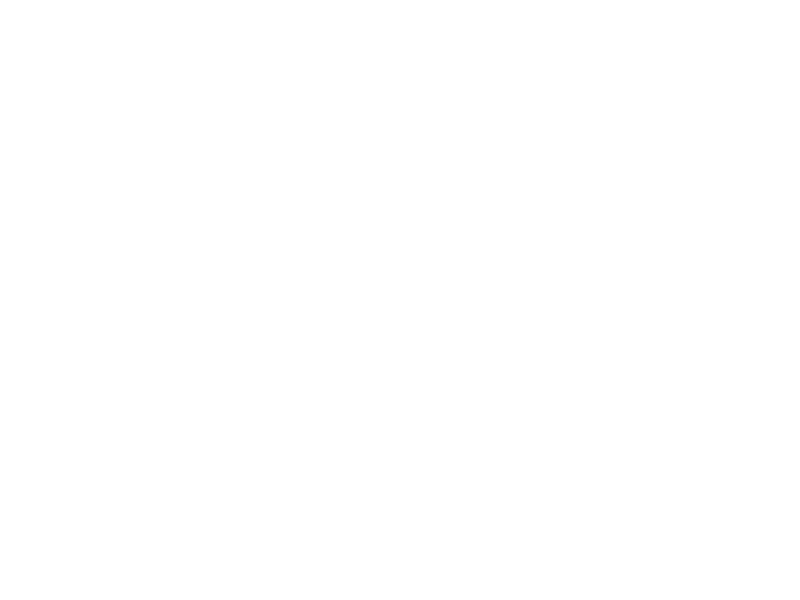

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
data_x = np.linspace(0, 10, 50)
data_y = np.sin(data_x) + np.random.random(data_x.shape[0])*0.5
fig = plt.figure()
plt.plot(data_x, data_y, 'o')
plt.show()

### Podział na dane uczące i walidacyjne

Dane walidacyjne służą do monitorowania procesu uczenia, sprawdzania jak sieć radzi sobie z danymi, które nie są wykorzystywane do modyfikacji wag.

Jeśli błąd na danych uczących maleje, a na danych walidacyjnych już nie (lub wręcz rośnie), jest to potencjalny sygnał, że sieć jest przeczuczona.

<IPython.core.display.Javascript object>


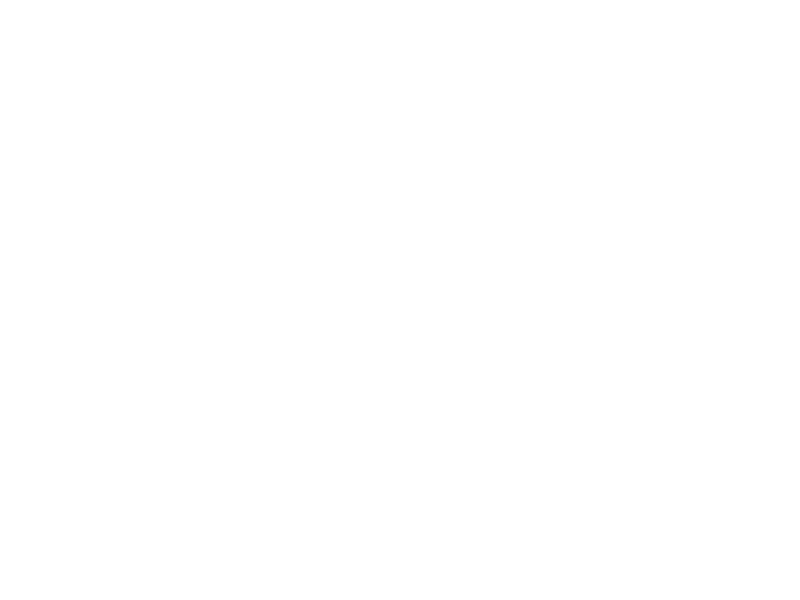

In [7]:
temp = np.arange(50)
np.random.shuffle(temp)
val_x = data_x[temp[35:]]
val_y = data_y[temp[35:]]
data_x = data_x[temp[:35]]
data_y = data_y[temp[:35]]

fig = plt.figure()
plt.plot(data_x, data_y, 'bo', label='uczace')
plt.plot(val_x, val_y, 'ro', label='validacyjne')
plt.legend()
plt.show()

#### Model sieci MLP

Mała sieć, 35 neuronów w warstwie ukrytej.

In [8]:
model = Sequential()
model.add(Dense(35, input_dim=1, use_bias=True, activation='tanh', kernel_initializer='random_uniform', bias_initializer='random_uniform'))
model.add(Dense(1, use_bias=True, activation='linear', kernel_initializer='random_uniform', bias_initializer='random_uniform'))

rms = optimizers.RMSprop(lr=0.001)
model.compile(loss='mse', optimizer=rms)

<IPython.core.display.Javascript object>


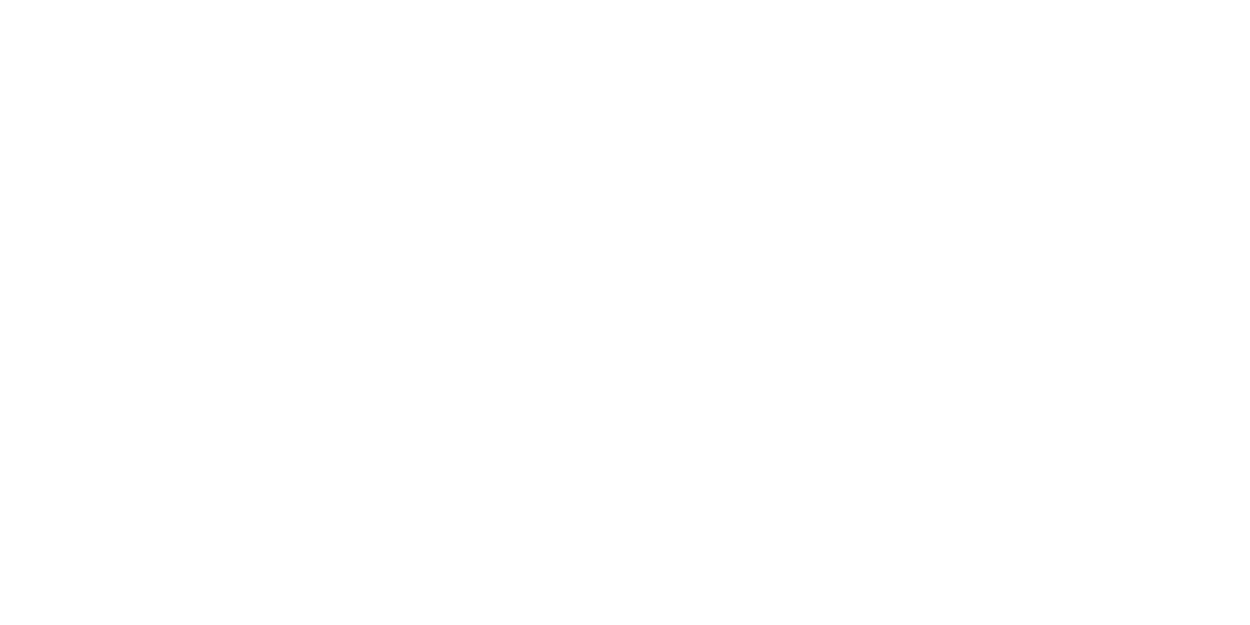

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation
from time import time

data_xx = np.linspace(0, 10, 100)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

train_loss = []
val_loss = []

def animate(i):
    global train_loss
    global val_loss
    hist = model.fit(data_x, data_y, epochs=10, verbose=0, batch_size=35, validation_data=(val_x, val_y))
    train_loss.append(model.evaluate(data_x, data_y, verbose=0))
    val_loss.append(model.evaluate(val_x, val_y, verbose=0))
    pred = model.predict(data_xx)
    
    ax1.clear()
    ax2.clear()
    ax1.plot(data_x, data_y, 'bo', label='uczace')
    ax1.plot(val_x, val_y, 'ro', label='walidacyjne')
    ax1.plot(data_xx, pred, 'k-', label='MLP')
    ax1.legend()
    ax2.plot(train_loss, label='train_loss')
    ax2.plot(val_loss, label='val_loss')
    ax2.legend()
    return ax1, ax2

dt = 1./30
t0 = time()
animate(0)
t1 = time()
interval = 100 * dt - (t1 - t0)

anim = animation.FuncAnimation(fig, animate, frames=10, interval=interval, blit=True)
plt.show()

#### Model sieci MLP


Większa sieć, dwie warstwy ukryte odpowiednio 100 i 50 neuronów.

In [10]:
model = Sequential()
model.add(Dense(100, input_dim=1, use_bias=True, activation='tanh', kernel_initializer='random_uniform', bias_initializer='random_uniform'))
model.add(Dense(50, use_bias=True, activation='tanh', kernel_initializer='random_uniform', bias_initializer='random_uniform'))
model.add(Dense(1, use_bias=True, activation='linear', kernel_initializer='random_uniform', bias_initializer='random_uniform'))

rms = optimizers.RMSprop(lr=0.001)
model.compile(loss='mse', optimizer=rms)

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation
from time import time

data_xx = np.linspace(0, 10, 100)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# If the three integers are R, C, and P in order, 
# the subplot will take the Pth position on a grid with R rows and C columns.

train_loss = []
val_loss = []

def animate(i):
    global train_loss
    global val_loss
    hist = model.fit(data_x, data_y, epochs=10, verbose=0, batch_size=35, validation_data=(val_x, val_y))
    train_loss.append(model.evaluate(data_x, data_y, verbose=0))
    val_loss.append(model.evaluate(val_x, val_y, verbose=0))
    pred = model.predict(data_xx)
    
    ax1.clear()
    ax2.clear()
    ax1.plot(data_x, data_y, 'bo', label='uczace')
    ax1.plot(val_x, val_y, 'ro', label='walidacyjne')
    ax1.plot(data_xx, pred, 'k-', label='MLP')
    ax1.legend()
    ax2.plot(train_loss, label='train_loss')
    ax2.plot(val_loss, label='val_loss')
    ax2.legend()
    return ax1, ax2

dt = 1./30
t0 = time()
animate(0)
t1 = time()
interval = 100 * dt - (t1 - t0)

anim = animation.FuncAnimation(fig, animate, frames=10, interval=interval, blit=True)
plt.show()

<IPython.core.display.Javascript object>

### Kiedy zakończyć uczenie?
Jednym z kluczowych aspektów (poza doborem architektury) jest zdecydowanie kiedy zakończyć uczenie sieci neuronowej. Najpopularniejsza technika polega na obserwacji wartości błedów osiąganych na zbiorze uczącym i zbiorze walidacyjnym. Gdy błąd na zbiorze walidacyjnym przestaje maleć (zazwyczaj zaczyna rosnąć) to znaczy, że sieć zaczyna się przeuczać (traci swoje zdalonośći generalizacyjne) i wtedy należy zakończyć proces uczenia. Taka strategia nazywa się strategią wczesnego zatrzymania (_early stopping_).

## Problemy klasyfikacyjne z wieloma klasami

Baza danych irysów zawiera przykłady z trzech klas. Zwróć uwagę na odpowiednie zakodowanie informacji o etykietach klas dla przykładów za pomocą funkcji `keras.utils.to_categorical`

In [12]:
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

iris_db = datasets.load_iris()
print(dir(iris_db))
print(type(iris_db.data)) #dane jako macierz numpy
print(iris_db.data.shape) #kazdy przyklad w wierszu
print(iris_db.feature_names) #nazwy atrybutow (sygnaly wejsciowe sieci)
print(iris_db.data[:10,:]) #podglad
print(iris_db.target_names) #nazwy trzech klas
print(iris_db.target) #etykiety klas zakodowane numerycznie jako 0, 1, 2

#d: zakodowane etykiety klas w sposob umozliwiajacy uczenie sieci
d = keras.utils.to_categorical(iris_db.target, num_classes=3)
print(type(d))
print(d.shape)
print(d[:5,:])

['DESCR', 'data', 'feature_names', 'target', 'target_names']
<class 'numpy.ndarray'>
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
<class 'numpy.ndarray'>
(150, 3)
[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]


### Warstwa wyjściowa softmax

W warstwie wyjściowej softmax, każdy neuron realizuje sumę ważoną dochodzących do niego sygnałów wejściowych. Następnie, odpowiedzi wszystkich neuronów wyjściowych są przetwarzane zgodnie ze wzorem

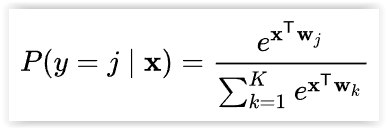

gdzie $K$ to liczba neuronów wyjściowych (liczba klas w problemie klasyfikacyjnym), $w_j$ to wagi j-tego neuronu wyjściowego, $x$ to sygnały wejściowe neuronów z warstwy wyjściowej (odpowiedzi poprzedniej warstwy).

Wartości te mogą być interpretowane jako prawdopodobieństwa przynależności danego przykładu (podanego na wejście sieci) do danej klasy, którą reprezentuje j-ty neuron wyjściowy.

Dla takiej warstwy wyjściowej, funkcją straty używaną w trakcie uczenia jest zazwyczaj `categorical_entropy`, która mierzy podobieństwo dwóch rozkładów prawdopodobieństwa przynależności danych trenujących do klas: rzeczywisty (na podstawie zbioru trenującego) oraz ten realizowany przez sieć.

#### Zapis i odczyt modelu do/z pliku

W poniższym przykładzie zwróć uwagę na zapis modelu do pliku i jego ponowne wczytanie.

In [13]:
model = Sequential()
model.add(Dense(30, activation='tanh', input_dim=4))
model.add(Dense(3, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(iris_db.data, d,
          epochs=200,
          batch_size=10)

score = model.evaluate(iris_db.data, d, batch_size=10)
print('model koncowy:',score)

#sprawdzenie czy dziala zapis/odczyt modelu z pliku
model.save('my_model.h5')
from keras.models import load_model
model2 = load_model('my_model.h5')
score2 = model2.evaluate(iris_db.data, d, batch_size=10)
print('model z pliku:',score2)

Epoch 1/200
150/150 [==============================] - 1s 4ms/step - loss: 0.9919 - acc: 0.4600
Epoch 2/200
150/150 [==============================] - 0s 721us/step - loss: 0.5595 - acc: 0.7333
Epoch 3/200
150/150 [==============================] - 0s 776us/step - loss: 0.3969 - acc: 0.8933
Epoch 4/200
150/150 [==============================] - 0s 1ms/step - loss: 0.3385 - acc: 0.8867
Epoch 5/200
150/150 [==============================] - 0s 1ms/step - loss: 0.2766 - acc: 0.9333
Epoch 6/200
150/150 [==============================] - 0s 926us/step - loss: 0.2548 - acc: 0.9333
Epoch 7/200
150/150 [==============================] - 0s 779us/step - loss: 0.2319 - acc: 0.9400
Epoch 8/200
150/150 [==============================] - 0s 716us/step - loss: 0.1879 - acc: 0.9533
Epoch 9/200
150/150 [==============================] - 0s 637us/step - loss: 0.2045 - acc: 0.9267
Epoch 10/200
150/150 [==============================] - 0s 558us/step - loss: 0.1680 - acc: 0.9400
Epoch 11/200
150/150 [===

/opt/conda/lib/python3.6/site-packages/keras/callbacks.py:116: UserWarning: Method on_batch_end() is slow compared to the batch update (0.128560). Check your callbacks.
  % delta_t_median)


150/150 [==============================] - 0s 3ms/step - loss: 0.1012 - acc: 0.9667
Epoch 27/200
150/150 [==============================] - 0s 1ms/step - loss: 0.0893 - acc: 0.9733
Epoch 28/200
150/150 [==============================] - 0s 1ms/step - loss: 0.1034 - acc: 0.9467
Epoch 29/200
150/150 [==============================] - 0s 2ms/step - loss: 0.0871 - acc: 0.9733
Epoch 30/200
150/150 [==============================] - 0s 971us/step - loss: 0.0957 - acc: 0.9667
Epoch 31/200
150/150 [==============================] - 0s 783us/step - loss: 0.0968 - acc: 0.9667
Epoch 32/200
150/150 [==============================] - 0s 931us/step - loss: 0.0881 - acc: 0.9800
Epoch 33/200
150/150 [==============================] - 0s 974us/step - loss: 0.0926 - acc: 0.9667
Epoch 34/200
150/150 [==============================] - 0s 912us/step - loss: 0.1038 - acc: 0.9467
Epoch 35/200
150/150 [==============================] - 0s 913us/step - loss: 0.0688 - acc: 0.9800
Epoch 36/200
150/150 [=========

150/150 [==============================] - 0s 621us/step - loss: 0.0671 - acc: 0.9800
Epoch 108/200
150/150 [==============================] - 0s 495us/step - loss: 0.0697 - acc: 0.9733
Epoch 109/200
150/150 [==============================] - 0s 637us/step - loss: 0.0634 - acc: 0.9733
Epoch 110/200
150/150 [==============================] - 0s 728us/step - loss: 0.0805 - acc: 0.9667
Epoch 111/200
150/150 [==============================] - 0s 629us/step - loss: 0.0870 - acc: 0.9600
Epoch 112/200
150/150 [==============================] - 0s 622us/step - loss: 0.0641 - acc: 0.9800
Epoch 113/200
150/150 [==============================] - 0s 712us/step - loss: 0.0678 - acc: 0.9733
Epoch 114/200
150/150 [==============================] - 0s 631us/step - loss: 0.0824 - acc: 0.9600
Epoch 115/200
150/150 [==============================] - 0s 668us/step - loss: 0.2098 - acc: 0.9400
Epoch 116/200
150/150 [==============================] - 0s 747us/step - loss: 0.0721 - acc: 0.9667
Epoch 117/200


150/150 [==============================] - 0s 657us/step - loss: 0.0680 - acc: 0.9600
Epoch 188/200
150/150 [==============================] - 0s 617us/step - loss: 0.0592 - acc: 0.9800
Epoch 189/200
150/150 [==============================] - 0s 662us/step - loss: 0.0717 - acc: 0.9733
Epoch 190/200
150/150 [==============================] - 0s 723us/step - loss: 0.0729 - acc: 0.9733
Epoch 191/200
150/150 [==============================] - 0s 686us/step - loss: 0.0641 - acc: 0.9800
Epoch 192/200
150/150 [==============================] - 0s 638us/step - loss: 0.1111 - acc: 0.9667
Epoch 193/200
150/150 [==============================] - 0s 680us/step - loss: 0.0701 - acc: 0.9667
Epoch 194/200
150/150 [==============================] - 0s 530us/step - loss: 0.0689 - acc: 0.9733
Epoch 195/200
150/150 [==============================] - 0s 711us/step - loss: 0.0641 - acc: 0.9733
Epoch 196/200
150/150 [==============================] - 0s 887us/step - loss: 0.0632 - acc: 0.9867
Epoch 197/200


## Zadanie 1 

Naucz sieć diagnozować cukrzycę.

- Wykorzytaj dane z pliku `pima-indians-diabetes.data.csv`. Dane są również dostępne w `sklearn`. Zaimportuje je jako `diab_db=datasets.load_diabetes()`

- Podziel dostępne dane losowo na dane uczące i testowe (walidacyjne) w proporcji 70% / 30%. Podział danych jest wykonywany raz i jest używany niezmieniony w dalszych obliczeniach dla wszystkich sieci.

- Dobierz jak najlepsze parametry uczenia oraz architektury sieci z jedną oraz z dwiema warstwami ukrytymi (po jednej na każdy rodzaj). Jakość działania sieci oceniamy na podstawie jej wyników na danych testowych. Postaraj się w odpowiednim momencie zatrzymać proces uczenia.

- Czy sieć z dwiema warstwami ukrytymi działa lepiej niż sieć z jedną warstwą ukrytą? Porównania i wnioski przedstaw na podstawie uśrednionych wyników dziesięciu sieci każdego rodzaju (tzn. najpierw ustal architekturę sieci, następnie przeprowadź 10 procesów trenownia, startując za każdym razem z losowych początkowych wag). 

- W dostarczonym kodzie umieść proces uczenia i testowania wybranych architektur sieci.

In [14]:
# YOUR CODE HERE
dataset = np.loadtxt("pima-indians-diabetes.data.csv", delimiter=',')
X = dataset[:, 0:8]
Y = dataset[:, 8]

data_x = X[:309]
data_y = Y[:309]
val_x = X[309:]
val_y = Y[309:]

#---Jedna warstwa ukryta---------
model_1 = Sequential()
model_1.add(Dense(30, input_dim=8, use_bias=True, activation='tanh', kernel_initializer='random_uniform', bias_initializer='random_uniform'))
model_1.add(Dense(1, use_bias=True, activation='sigmoid', kernel_initializer='random_uniform', bias_initializer='random_uniform'))

rms = optimizers.RMSprop(lr=0.001)
model_1.compile(loss='mse', optimizer=rms, metrics=['accuracy'])

#model_1.fit(data_x, data_y, epochs=150, verbose=1, batch_size=10, validation_data=(val_x, val_y))

#score = model_1.evaluate(val_x, val_y, batch_size=10)
#print('\n  [model_1] model koncowy: {}'.format(score))

#---Dwie warstwy ukryte---------
model_2 = Sequential()
model_2.add(Dense(12, input_dim=8, use_bias=True, activation='tanh', kernel_initializer='random_uniform', bias_initializer='random_uniform'))
model_2.add(Dense(8, use_bias=True, activation='tanh', kernel_initializer='random_uniform', bias_initializer='random_uniform'))
model_2.add(Dense(1, use_bias=True, activation='sigmoid', kernel_initializer='random_uniform', bias_initializer='random_uniform'))

rms = optimizers.RMSprop(lr=0.001)
model_2.compile(loss='mse', optimizer=rms, metrics=['accuracy'])

#model_2.fit(data_x, data_y, epochs=150, verbose=1, batch_size=10, validation_data=(val_x, val_y))

#score = model_2.evaluate(val_x, val_y, batch_size=10)
#print('\n  [model_2] model koncowy: {}'.format(score))

scalars = np.zeros(shape=(10,2,2))
for i in range(0, 10):
    np.random.seed(i)
    
    model_1.fit(data_x, data_y, epochs=150, verbose=0, batch_size=10, validation_data=(val_x, val_y))
    scalars[i, 0] = model_1.evaluate(val_x, val_y, batch_size=10)
    
    model_2.fit(data_x, data_y, epochs=150, verbose=0, batch_size=10, validation_data=(val_x, val_y))
    scalars[i, 1] = model_2.evaluate(val_x, val_y, batch_size=10)

print('\n [model_1] loss mean:       {}'.format(scalars[:, 0, 0].mean()))
print(' [model_1] accuracy mean:   {}'.format(scalars[:, 0, 1].mean()))
print('==========================')
print(' [model_2] loss mean:       {}'.format(scalars[:, 1, 0].mean()))
print(' [model_2] accuracy mean:   {}'.format(scalars[:, 1, 1].mean()))

FileNotFoundError: [Errno 2] No such file or directory: 'pima-indians-diabetes.data.csv'

TWOJE KOMENTARZE I WNIOSKI:

YOUR ANSWER HERE

W obu przypadkach siec daje bardzo podobne wyniki. Z danymi parametrami uczenia (architektura sieci) nie da sie powiedziec, ze siec dziala lepej w przypadku 2 warstw ukrytych lub 1. 

<div style="text-align: right">&copy; Zakład Inteligencji Obliczeniowej, Instytut Informatyki, Politechnika Krakowska </div>